In [1]:
import operator
import random
import math
import numpy as np
from deap import algorithms, tools, base, creator, gp

# algorithms = Nos permet de definir los algoritmos evolutivos
# tools = Proporciona herramientas para la manipulacion de individuos y poblaciones
# base = Proporciona las clases base para definir los componentes del algoritmo genetico
# creator = Permite crear nuevas clases para individuos y poblaciones
# gp = Proporciona herramientas para la programacion genetica

In [2]:
import pandas as pd

In [12]:
data = pd.read_csv("data.csv")
X = data["x"].values
Y = data["y"].values

In [4]:
def fun_objetivo(x):
    return x**3 + x**2 + x + 1

In [5]:
# Creamos el cconjunto de primitivas
pset = gp.PrimitiveSet("MAIN", 1)  # 1 es el numero de argumentos de la funcion
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.cos, 1)
pset.addEphemeralConstant("rand101", lambda: random.uniform(-1,1))

pset.renameArguments(ARG0="x")

creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individuo", gp.PrimitiveTree, fitness = creator.FitnessMin)

d:\anaconda3\envs\ds_venv\Lib\site-packages\deap\gp.py:257: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


In [6]:
toolbox = base.Toolbox()

toolbox.register("expr", gp.genHalfAndHalf, pset = pset, min_=1, max_=2)
toolbox.register("individuo", tools.initIterate, creator.Individuo, toolbox.expr)
toolbox.register("poblacion", tools.initRepeat, list, toolbox.individuo)

toolbox.register("compile", gp.compile, pset = pset)

In [13]:
data_points = np.linspace(-1, 1, 100)

x = datosCSV["x"]
y = datosCSV["y"]

valores_objetivo = []
for x in datosCSV["x"]:
    y = fun_objetivo(x)
    valores_objetivo.append(y)

def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    # error cuadrático medio
    sqerrors = ((func(x) - y)**2 for x, y in points)
    return math.fsum(sqerrors) / len(points),

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", evalSymbReg, points=list(zip(X, Y)))
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset)


d:\anaconda3\envs\ds_venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\anaconda3\envs\ds_venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#*****************Algoritmo Evolutivo*****************
# Creamos una poblacion inicial
Poblacion = toolbox.population(n=100)
hof = tools.HallOfFame(1)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

algorithms.eaSimple(Poblacion, toolbox, 0.5, 0.5, 100, stats=stats, halloffame=hof, verbose=True)

print("Mejor individuo: ", hof[0])
print()

import sympy
x = sympy.symbols('x')

remplacements = {
    'add': lambda a, b: a + b,
    'sub': lambda a, b: a - b,
    'mul': lambda a, b: a * b,
    'neg': lambda a: -a,
    'sin': sympy.sin,
    'cos': sympy.cos
}

expr = str(hof[0])
expr_sympy = sympy.sympify(expr, locals=remplacements)

print("\nExpresion Simpy: ", sympy.simplify(expr_sympy))

best_func = toolbox.compile(expr=hof[0])    
print()

for x, y in zip(data_points, valores_objetivo):
    print("x=%.2f, y=%.2f, f(x)=%.2f" % (x, y, best_func(x)))

gen	nevals	avg    	std    	min    	max    
0  	100   	3241.51	58.4999	3087.26	3444.14
1  	77    	3223.05	49.6883	3040.89	3309.54
2  	81    	3215.74	74.9869	2987.34	3444.14
3  	81    	3198.24	62.9989	3080.31	3463.6 
4  	77    	3185.34	76.2494	3040.89	3509.08
5  	80    	3172.39	67.8066	2953.3 	3373.54
6  	79    	3182.62	88.1459	2925.35	3444.14
7  	74    	3148.04	79.8464	2925.35	3324.62
8  	78    	3130.13	114.74 	2798.6 	3429.77
9  	75    	3074.8 	128.878	2658.92	3341.97
10 	78    	3060.55	179.119	2634.64	3525.48
11 	71    	3001.7 	251.1  	1874.35	3821.96
12 	71    	2907.57	244.563	1874.35	3433.27
13 	80    	2861.35	323.501	1537.49	3762.08
14 	77    	2782.54	441.567	1235.85	3903.07
15 	73    	2634.38	511.064	1233.47	3866.64
16 	72    	2505.17	592.643	1066.92	4138.29
17 	68    	2353.02	876.909	753.579	7736.79
18 	82    	2224.59	1897.84	753.579	20188.3
19 	73    	1873.25	701.865	658.291	4729.84
20 	73    	1640.63	733.068	449.001	4987.07
21 	81    	1585.56	1180.69	177.411	9947.48
22 	80    	

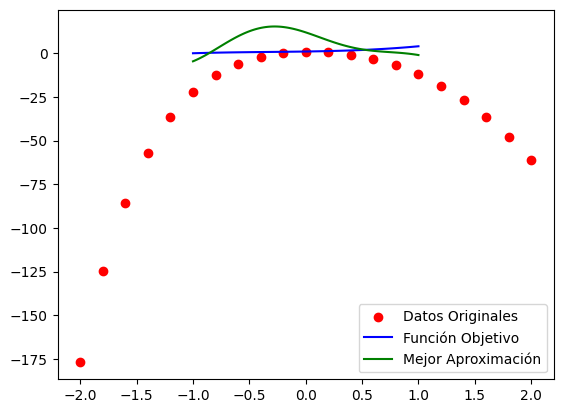

In [15]:
# Graficar
import matplotlib.pyplot as plt
# Grafica
plt.scatter(X, Y, label='Datos Originales', color='red')
plt.plot(data_points, [fun_objetivo(x) for x in data_points], label='Función Objetivo', color='blue')
plt.plot(data_points, [best_func(x) for x in data_points], label='Mejor Aproximación', color='green')
plt.legend()
plt.show()